In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
pip install xgboost


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [4]:
df=pd.read_csv('raw.csv')

In [6]:
df.head()

,Labor Requirements,Equipment Usage,Material Quantities,Project Duration (days),Resource Allocation Efficiency,Schedule Optimization,Computation Time (CT),Best Cost (BC),Evaluation Metric (Nfe),Mean Resource Demand,SD of Resource Demand,Risk Level
0,152,21,752.666578,291,79.740040,0,119.105430,9.001976e+05,180,78.028242,10.530459,0
1,142,17,1463.863953,348,71.332190,1,153.138143,1.056578e+06,182,90.144405,15.429264,2
2,64,20,1639.016492,341,91.470780,0,101.541888,3.083878e+05,290,98.225578,12.600627,0
3,156,12,1250.667964,278,75.897926,1,233.622856,5.412628e+05,295,90.883581,15.876901,2
4,121,23,1313.545497,318,80.544442,0,125.276613,1.142576e+06,207,93.694853,12.613284,1


In [7]:
X = df.drop(columns=['Labor Requirements'],axis=1)

In [8]:
y = df['Labor Requirements']

In [9]:
y

0      152
1      142
2       64
3      156
4      121
      ... 
995    190
996    172
997    111
998     81
999     78
Name: Labor Requirements, Length: 1000, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 11)

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 11), (200, 11))

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 43.0503
- Mean Absolute Error: 37.4426
- R2 Score: 0.0122
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.4398
- Mean Absolute Error: 40.1866
- R2 Score: 0.0034


Lasso
Model performance for Training set
- Root Mean Squared Error: 43.1342
- Mean Absolute Error: 37.5998
- R2 Score: 0.0084
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.4227
- Mean Absolute Error: 40.1896
- R2 Score: 0.0041


Ridge
Model performance for Training set
- Root Mean Squared Error: 43.0503
- Mean Absolute Error: 37.4429
- R2 Score: 0.0122
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 45.4395
- Mean Absolute Error: 40.1866
- R2 Score: 0.0034


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 38.0120
- Mean Absolute Error: 32.1323
- R2 Score: 0.2299
---------

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,AdaBoost Regressor,0.005233
1,Lasso,0.004106
2,Ridge,0.003367
0,Linear Regression,0.003358
5,Random Forest Regressor,-0.061578
3,K-Neighbors Regressor,-0.132651
6,XGBRegressor,-0.254595
4,Decision Tree,-0.904385


In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 0.34


In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,110,125.917922,-15.917922
737,194,137.098082,56.901918
740,117,119.077972,-2.077972
660,92,119.182421,-27.182421
411,82,121.287657,-39.287657
...,...,...,...
408,133,122.421098,10.578902
332,109,120.765350,-11.765350
208,51,114.360177,-63.360177
613,83,121.327473,-38.327473


  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.multioutput import MultiOutputRegressor

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Load your dataset
df = pd.read_csv("raw.csv")  # 🔁 Replace with actual path

# Define target columns (you can modify these as needed)
target_columns = [
    "Schedule Optimization",
    "Resource Allocation Efficiency",
    "Best Cost (BC)",
    "Risk Level",
    "Computation Time (CT)"
]

# Define X and Y
X = df.drop(columns=target_columns)
Y = df[target_columns]

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Evaluation function
def evaluate_model(true, predicted):
    r2_scores = []
    for i in range(true.shape[1]):
        r2 = r2_score(true.iloc[:, i], predicted[:, i])
        r2_scores.append(r2)
    return np.mean(r2_scores), r2_scores

# ML Models
base_models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

# Store performance
results = []

for name, model in base_models.items():
    multi_model = MultiOutputRegressor(model)
    multi_model.fit(X_train, Y_train)

    Y_pred = multi_model.predict(X_test)
    avg_r2, individual_r2 = evaluate_model(Y_test, Y_pred)

    results.append((name, avg_r2))

    print(f"\n🧠 Model: {name}")
    print(f"🔢 Avg R² Score: {avg_r2:.4f}")
    for idx, target in enumerate(target_columns):
        print(f"   - R² for {target}: {individual_r2[idx]:.4f}")
    print("-" * 40)

# Find best model
best_model = max(results, key=lambda x: x[1])
print(f"\n✅ Best Model Overall: {best_model[0]} with Avg R² = {best_model[1]:.4f}")



🧠 Model: Linear Regression
🔢 Avg R² Score: -0.0151
   - R² for Schedule Optimization: -0.0130
   - R² for Resource Allocation Efficiency: -0.0091
   - R² for Best Cost (BC): -0.0114
   - R² for Risk Level: -0.0206
   - R² for Computation Time (CT): -0.0215
----------------------------------------

🧠 Model: Ridge
🔢 Avg R² Score: -0.0151
   - R² for Schedule Optimization: -0.0130
   - R² for Resource Allocation Efficiency: -0.0091
   - R² for Best Cost (BC): -0.0114
   - R² for Risk Level: -0.0206
   - R² for Computation Time (CT): -0.0215
----------------------------------------

🧠 Model: Lasso
🔢 Avg R² Score: -0.0138
   - R² for Schedule Optimization: -0.0049
   - R² for Resource Allocation Efficiency: -0.0093
   - R² for Best Cost (BC): -0.0114
   - R² for Risk Level: -0.0237
   - R² for Computation Time (CT): -0.0199
----------------------------------------

🧠 Model: Decision Tree
🔢 Avg R² Score: -1.0472
   - R² for Schedule Optimization: -1.1402
   - R² for Resource Allocation Effi

In [31]:
# Display results in table format
results_df = pd.DataFrame(results, columns=["Model", "Average R² Score"])
results_df = results_df.sort_values(by="Average R² Score", ascending=False).reset_index(drop=True)
display(results_df)  # or just use: print(results_df)


,Model,Average R² Score
0,Lasso,-0.013836
1,Ridge,-0.015118
2,Linear Regression,-0.015119
3,AdaBoost,-0.019488
4,Random Forest,-0.085462
5,K-Neighbors,-0.257459
6,XGBoost,-0.335524
7,Decision Tree,-1.047232


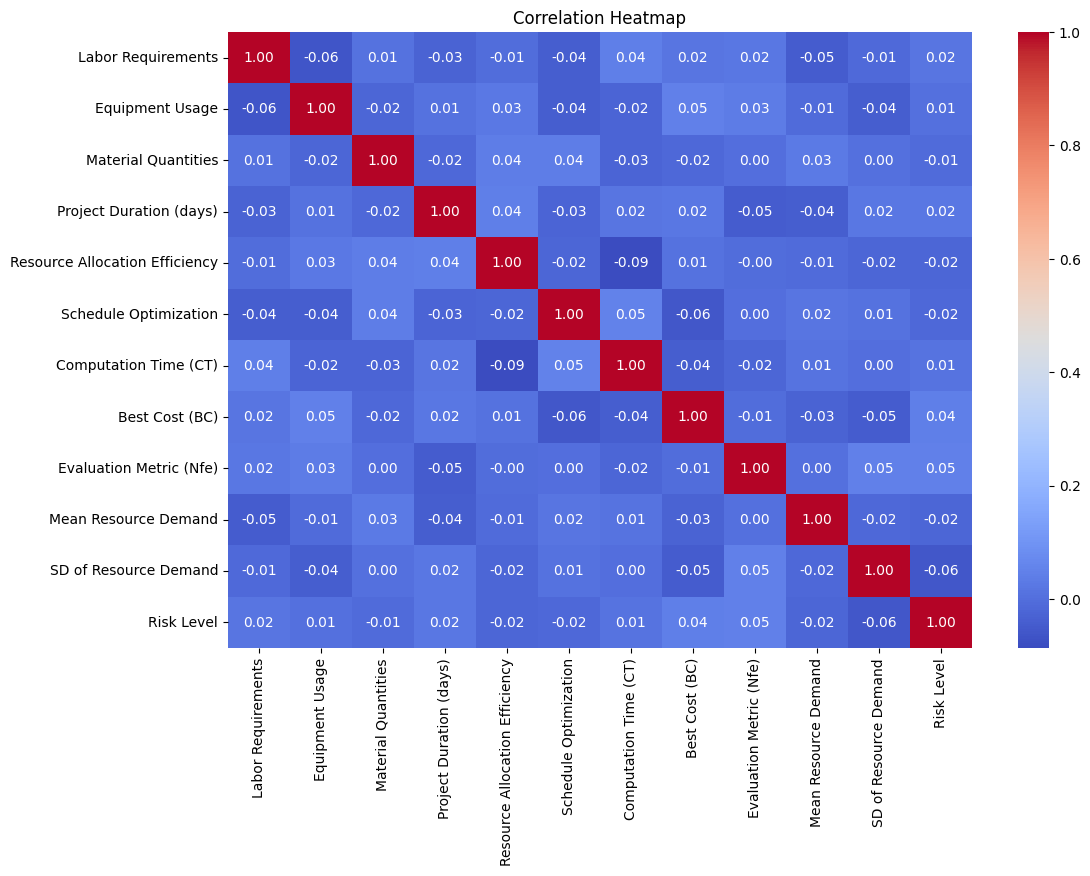

In [18]:
# Combine features and targets to see correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Load Data
df = pd.read_csv("raw.csv")  # change if needed

# Drop rows with null values (optional: you can also use imputation)
df.dropna(inplace=True)

# Define Features and Target
target = "Resource Allocation Efficiency"
X = df.drop(columns=[target])
y = df[target]

# Optional: Apply power transform to normalize skewed input features
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')  # handles both positive and negative values

X_scaled = scaler.fit_transform(X)
X_scaled = power.fit_transform(X_scaled)

# Optional: log-transform target if it's highly skewed (comment out if not needed)
# y = np.log1p(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluation Function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "K-Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=6),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=8),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
}

results = []

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae, rmse, r2 = evaluate_model(y_test, preds)
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2 Score": r2})

# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print("\nModel Performance (Sorted by R² Score):\n")
print(results_df)



Model Performance (Sorted by R² Score):

               Model        MAE       RMSE  R2 Score
2              Ridge   9.943122  11.639106 -0.013099
0  Linear Regression   9.943045  11.639146 -0.013106
1              Lasso   9.944816  11.639443 -0.013158
7           AdaBoost  10.013417  11.651104 -0.015189
5      Random Forest  10.084095  11.701808 -0.024044
3        K-Neighbors  10.368356  12.354988 -0.141557
6            XGBoost  10.498771  12.394492 -0.148868
4      Decision Tree  10.933411  13.265666 -0.316046


               Model        MAE       RMSE  R2 Score
1              Lasso  10.063743  11.654978 -0.015864
7           AdaBoost  10.087331  11.727855 -0.028608
5      Random Forest  10.125100  11.950467 -0.068028
2              Ridge  10.274725  12.125494 -0.099542
3        K-Neighbors  10.749345  12.730129 -0.211932
6            XGBoost  11.065804  13.009115 -0.265634
0  Linear Regression  10.859631  13.029850 -0.269672
4      Decision Tree  13.985135  16.833301 -1.119099


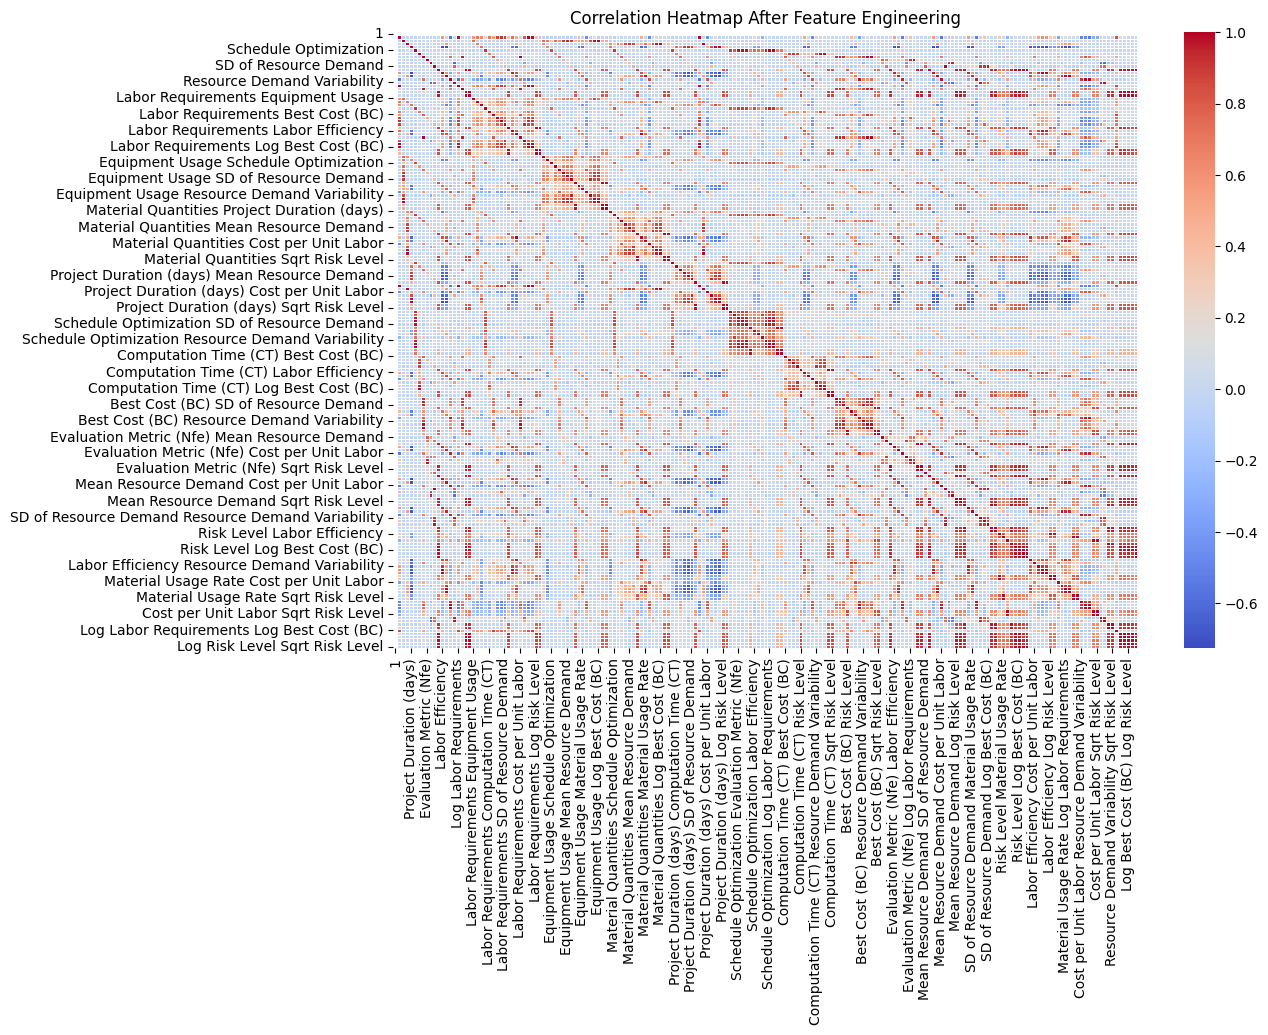

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Load Data
df = pd.read_csv("raw.csv")  # Change this to your actual path

# Drop target column before feature engineering
target = "Resource Allocation Efficiency"
X_original = df.drop(columns=[target])
y = df[target]

# Feature Engineering
X_original["Labor Efficiency"] = X_original["Labor Requirements"] / (X_original["Project Duration (days)"] + 1)
X_original["Material Usage Rate"] = X_original["Material Quantities"] / (X_original["Project Duration (days)"] + 1)
X_original["Cost per Unit Labor"] = X_original["Best Cost (BC)"] / (X_original["Labor Requirements"] + 1)
X_original["Resource Demand Variability"] = X_original["SD of Resource Demand"] / (X_original["Mean Resource Demand"] + 1)

# Log Transformations (Avoids Negative & Zero Values)
for col in ["Labor Requirements", "Best Cost (BC)", "Risk Level"]:
    X_original[f"Log {col}"] = np.log1p(X_original[col])

# Square Root Transformation for Risk Level
X_original["Sqrt Risk Level"] = np.sqrt(X_original["Risk Level"])

# Polynomial Features (2nd-degree interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_original)

# Convert to DataFrame
poly_features = poly.get_feature_names_out(X_original.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly_df)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluation Function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

results = []

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae, rmse, r2 = evaluate_model(y_test, preds)
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2 Score": r2})

# Convert to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)

# Plot Correlation Heatmap After Feature Engineering
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=poly_features).corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap After Feature Engineering")
plt.show()


📌 Features after VIF Selection: 11
🔥 Final Selected Features: 11
['Labor Requirements', 'Equipment Usage', 'Material Quantities', 'Project Duration (days)', 'Schedule Optimization', 'Computation Time (CT)', 'Best Cost (BC)', 'Evaluation Metric (Nfe)', 'Mean Resource Demand', 'SD of Resource Demand', 'Risk Level']


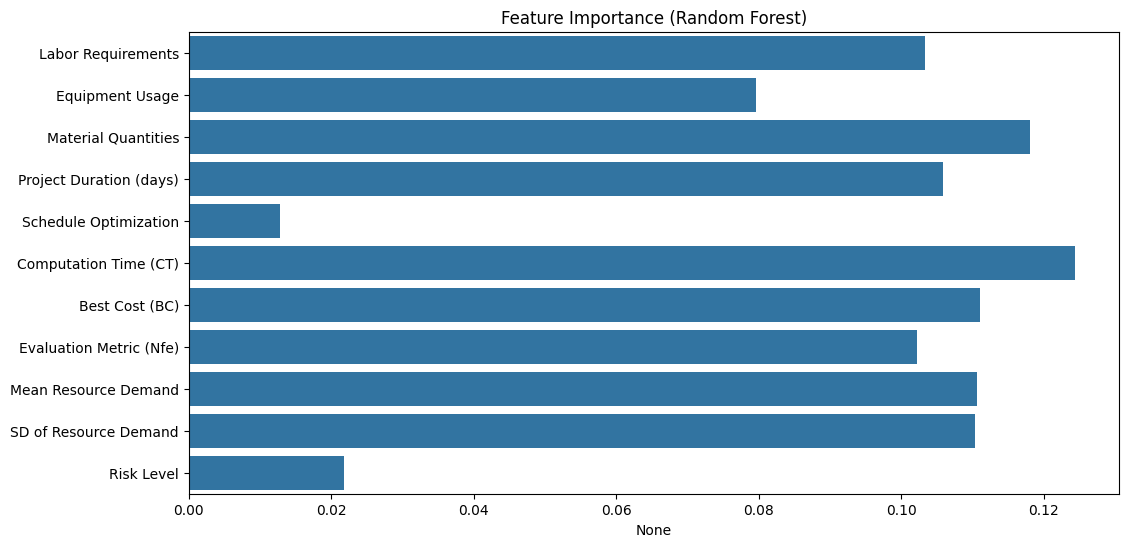

📊 Model Performance:
               R² Score        MAE       RMSE
Ridge         -0.013077   9.943614  11.638976
Lasso         -0.015978  10.063200  11.655628
Random Forest -0.036124  10.089317  11.770622


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
df = pd.read_csv("raw.csv")  # Update with actual filename

# Drop any missing values (optional)
df.dropna(inplace=True)

# Define target variable (update as needed)
target_column = "Resource Allocation Efficiency"  # Change based on what you're predicting
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Standardize data (important for Ridge/Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# --------- Feature Selection using VIF ---------
def calculate_vif(X, threshold=15):
    """Remove features with high VIF to avoid multicollinearity"""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data[vif_data["VIF"] < threshold]["Feature"].tolist()

selected_features = calculate_vif(X)
X_vif_selected = X[selected_features]

print(f"📌 Features after VIF Selection: {len(selected_features)}")

# --------- Feature Selection using Random Forest Importance ---------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_vif_selected, y)

# Get feature importance & keep the most important ones
feature_importance = pd.Series(rf.feature_importances_, index=X_vif_selected.columns)
selected_features = feature_importance[feature_importance > 0.01].index.tolist()

X_selected = X_vif_selected[selected_features]

print(f"🔥 Final Selected Features: {len(selected_features)}")
print(selected_features)

# --------- Split Data ---------
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# --------- Train Models ---------
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R² Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# --------- Plot Feature Importance ---------
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[selected_features], y=selected_features)
plt.title("Feature Importance (Random Forest)")
plt.show()

print("📊 Model Performance:")
print(results_df)


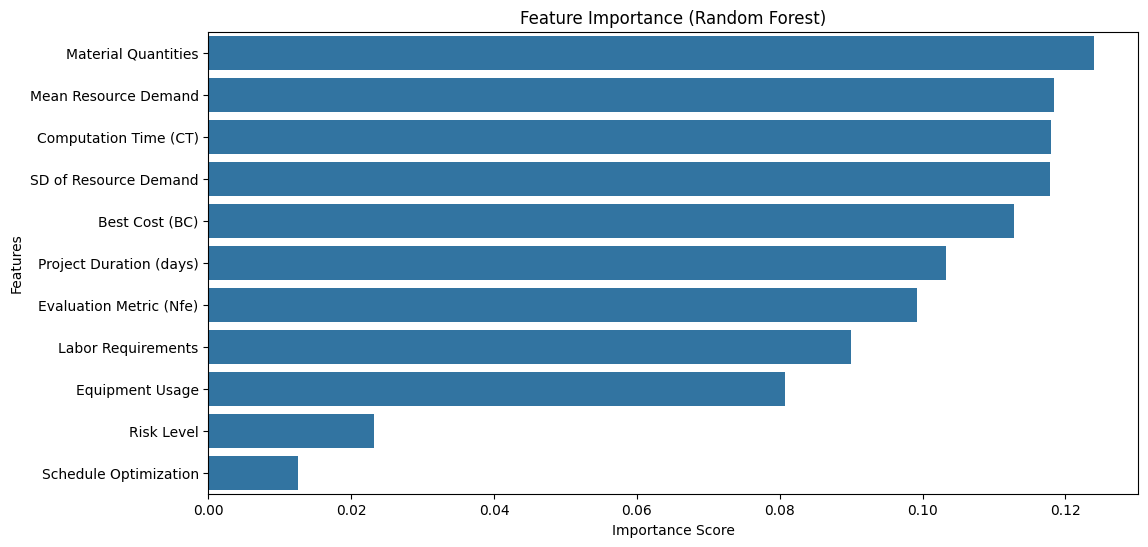

📊 Model Performance:
               R² Score        MAE       RMSE
Ridge         -0.013077   9.943614  11.638976
Lasso         -0.013139   9.945458  11.639332
Random Forest -0.036124  10.089317  11.770622
✅ Model saved as optimized_model.pkl


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset (Replace 'your_data.csv' with actual file)
df = pd.read_csv("raw.csv")  

# Define target & selected features
target_column = "Resource Allocation Efficiency"
selected_features = ['Labor Requirements', 'Equipment Usage', 'Material Quantities', 
                     'Project Duration (days)', 'Schedule Optimization', 'Computation Time (CT)', 
                     'Best Cost (BC)', 'Evaluation Metric (Nfe)', 'Mean Resource Demand', 
                     'SD of Resource Demand', 'Risk Level']

X = df[selected_features]
y = df[target_column]

# Standardize Data (for Ridge & Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------- Train Different Models ---------
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R² Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# --------- Feature Importance Plot (Random Forest) ---------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance.sort_values(ascending=False), y=feature_importance.sort_values(ascending=False).index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Print Model Performance
print("📊 Model Performance:")
print(results_df)

# Save Model (Optional)
import joblib
joblib.dump(rf, "optimized_model.pkl")
print("✅ Model saved as optimized_model.pkl")


🔥 Selected Features after VIF: ['Schedule Optimization', 'Best Cost (BC)', 'Risk Level']

📊 Model Performance:
            Model  R² Score        MAE       RMSE
0          Ridge -0.025273  10.062167  11.708828
1          Lasso -0.022525  10.061065  11.693127
2  Random Forest -0.098680  10.301413  12.120741
✅ Best Model (Lasso(alpha=0.1)) saved as 'optimized_model.pkl'


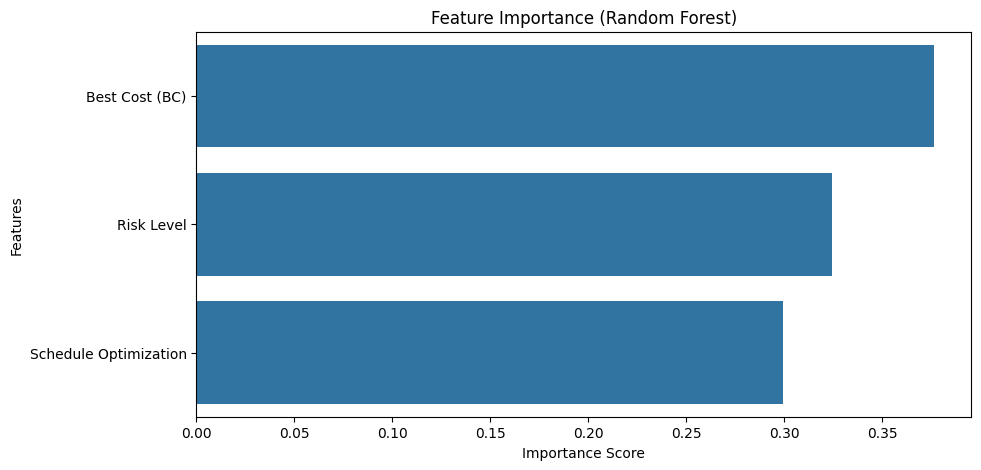

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_data.csv' with actual filename)
df = pd.read_csv("raw.csv")  

# 🔹 Define input features and target
st.write("Available columns:", df.columns.tolist())

target_column = "Resource Allocation Efficiency"  # Change to actual target column
X = df.drop(columns=[target_column])
y = df[target_column]

# 🔥 Step 1: Remove Multicollinearity using VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Iteratively remove features with high VIF (>5)
vif_threshold = 5
while True:
    vif_df = calculate_vif(X)
    high_vif_features = vif_df[vif_df["VIF"] > vif_threshold]["Feature"].tolist()
    if not high_vif_features:
        break
    X = X.drop(columns=high_vif_features)

print(f"🔥 Selected Features after VIF: {list(X.columns)}")

# 🔹 Step 2: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Step 3: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# 🔹 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 🔥 Step 5: Train Models & Compare Performance
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

results = []
best_model = None
best_score = float('-inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append((name, r2, mae, rmse))
    
    if r2 > best_score:
        best_score = r2
        best_model = model

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])
print("\n📊 Model Performance:\n", results_df)

# 🔥 Save Best Model
with open("optimized_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"✅ Best Model ({best_model}) saved as 'optimized_model.pkl'")

# 🔹 Step 6: Feature Importance (for Random Forest)
if "Random Forest" in models:
    rf = models["Random Forest"]
    feature_importances = rf.feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]
    feature_names = X.columns[sorted_idx]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature_importances[sorted_idx], y=feature_names)
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importance (Random Forest)")
    plt.show()


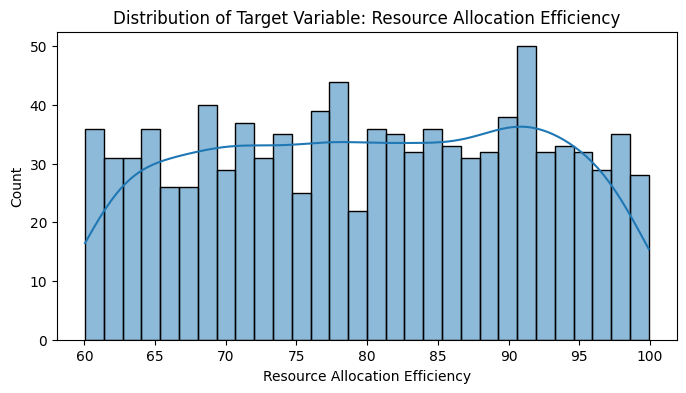

Target Mean: 80.14445021562439, Target Std Dev: 11.40282785945142


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribution of Target Variable: Resource Allocation Efficiency")
plt.show()

print(f"Target Mean: {y.mean()}, Target Std Dev: {y.std()}")


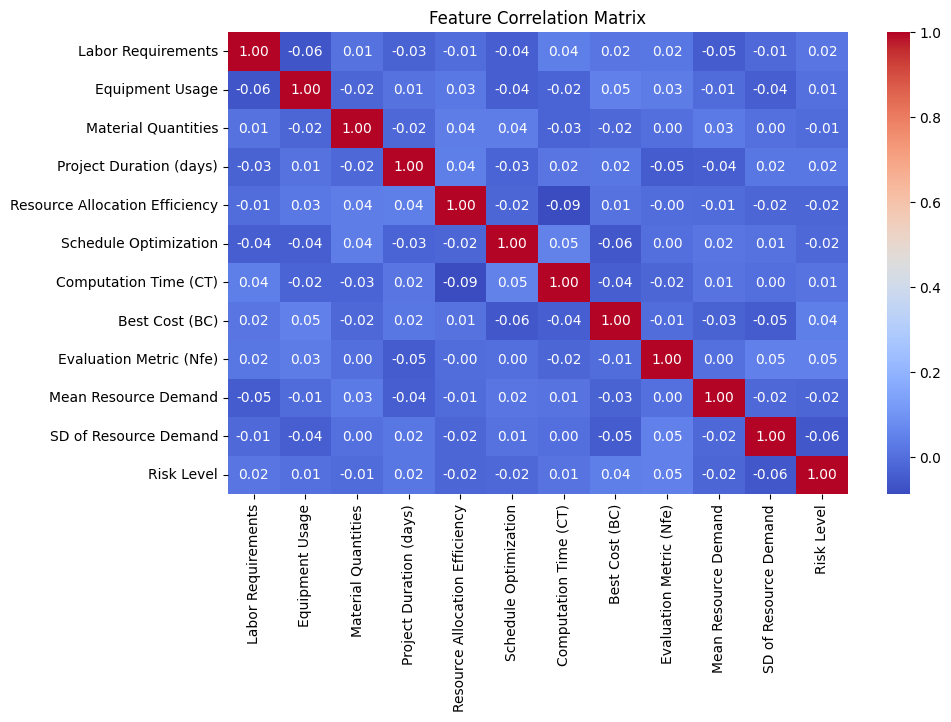

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

: 

In [ ]:
pip install -r requirements.txt


: 